# 1B

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Constants
N = 100
true_mu = 0
np.random.seed(0)
data = np.random.normal(loc=true_mu, scale=1, size=N)
data = torch.tensor(data, dtype=torch.float32)
M_values = [1, 10, 100, 1000]
T = 10
lr = 0.01  # Learning rate

In [5]:
def score_function_gradient(data, mu, num_samples):
    gradients = []
    for _ in range(num_samples):
        z = torch.normal(mean=mu, std=1.0)
        grad = (z - mu) * torch.sum((data - z) ** 2)
        gradients.append(grad)
    return torch.mean(torch.stack(gradients))

def reparam_gradient(data, mu, num_samples):
    gradients = []
    for _ in range(num_samples):
        epsilon = torch.randn(())
        z = mu + epsilon
        grad = -2 * torch.sum(data - z)
        gradients.append(grad)
    return torch.mean(torch.stack(gradients))

def perform_gradient_descent(gradient_func):
    means = []
    variances = []
    for M in M_values:
        mu_estimates = []
        for _ in range(T):
            mu = torch.tensor(0.0, requires_grad=True)
            for _ in range(100):  # Number of gradient descent steps
                grad = gradient_func(data, mu, M)
                mu.data -= lr * grad
            mu_estimates.append(mu.item())
        means.append(np.mean(mu_estimates))
        variances.append(np.var(mu_estimates))
    return means, variances


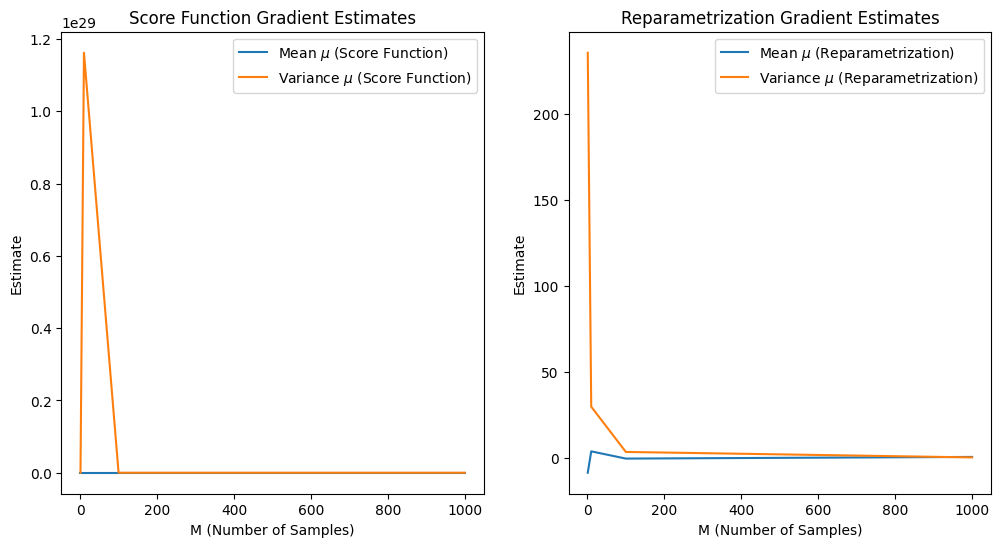

In [6]:
# Perform experiments
sf_means, sf_variances = perform_gradient_descent(score_function_gradient)
rp_means, rp_variances = perform_gradient_descent(reparam_gradient)

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(M_values, sf_means, label='Mean $\mu$ (Score Function)')
plt.plot(M_values, sf_variances, label='Variance $\mu$ (Score Function)')
plt.xlabel('M (Number of Samples)')
plt.ylabel('Estimate')
plt.title('Score Function Gradient Estimates')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(M_values, rp_means, label='Mean $\mu$ (Reparametrization)')
plt.plot(M_values, rp_variances, label='Variance $\mu$ (Reparametrization)')
plt.xlabel('M (Number of Samples)')
plt.ylabel('Estimate')
plt.title('Reparametrization Gradient Estimates')
plt.legend()

plt.show()

# 2A

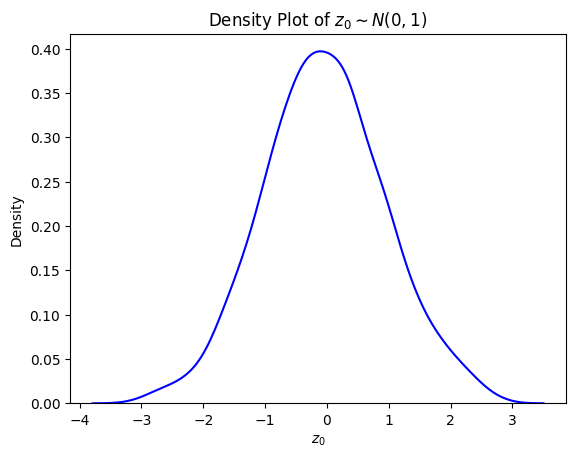

In [18]:
import seaborn as sns
from scipy.stats import norm

np.random.seed(0)
N = 1000
z0 = np.random.randn(N)

# Density plot for z0
sns.kdeplot(z0, color="blue")
plt.title("Density Plot of $z_0 \sim N(0, 1)$")
plt.xlabel("$z_0$")
plt.ylabel("Density")
plt.show()

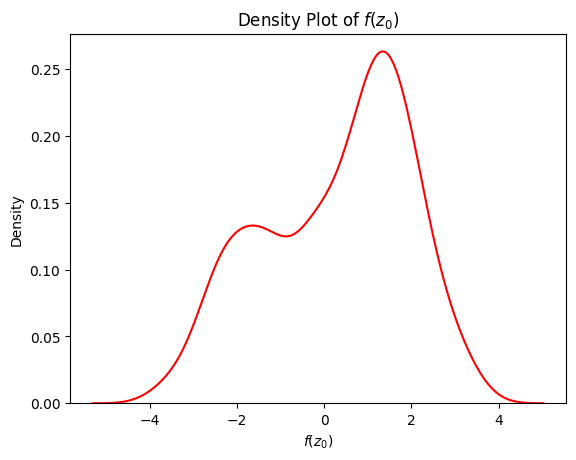

In [20]:
def tanh(x):
    return np.tanh(x)

def planar_flow(z, w, u, b):
    z = z.reshape(-1, 1)  
    w = w.reshape(-1, 1)  
    return z + u * tanh(np.dot(z, w) + b)

w = np.array([2.0])  
u = np.array([1.0])  
b = 1.0

zf = planar_flow(z0, w, u, b)

zf = zf.flatten()

sns.kdeplot(zf, color="red")
plt.title("Density Plot of $f(z_0)$")
plt.xlabel("$f(z_0)$")
plt.ylabel("Density")
plt.show()


# 3C

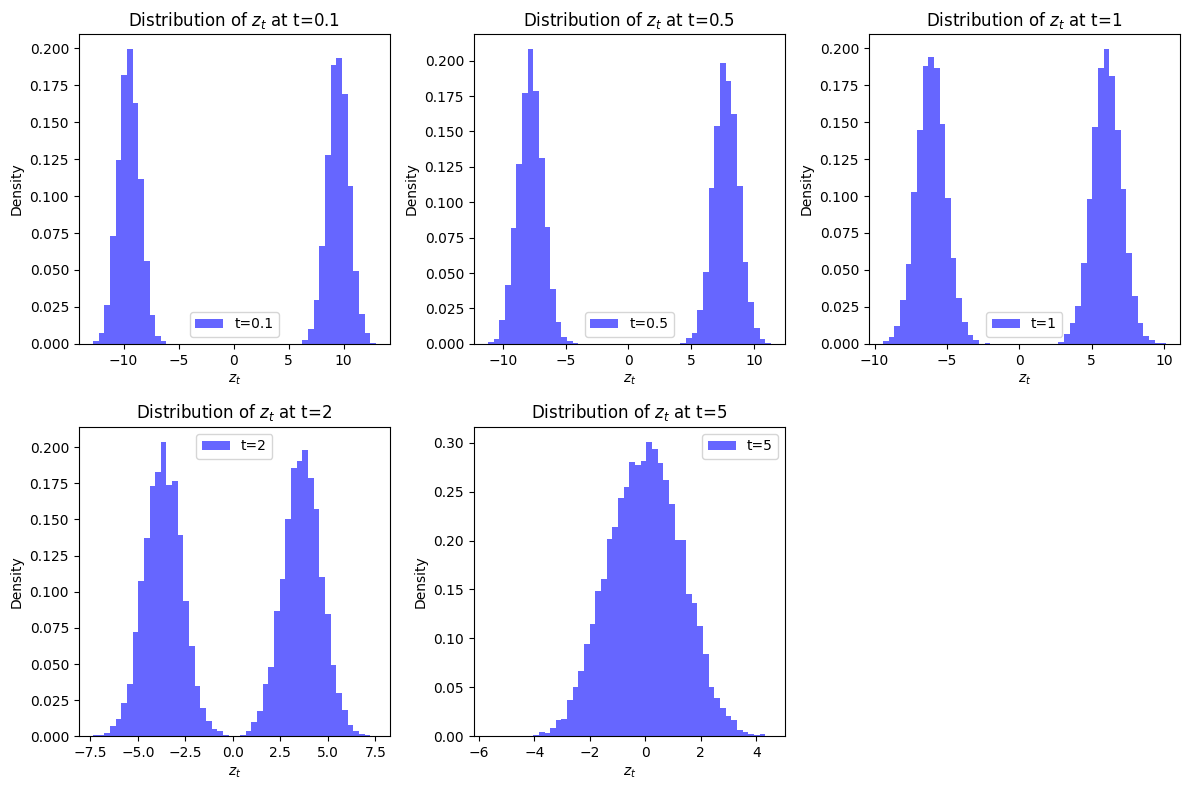

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to simulate z_t from z_0
def simulate_zt(z0, t):
    mean_zt = np.exp(-0.5 * t) * z0
    var_zt = 1 - np.exp(-t)
    return np.random.normal(mean_zt, np.sqrt(var_zt))

# Initial conditions
np.random.seed(0)
sample_size = 10000  # Number of samples for z0 and zt
z0_samples = np.concatenate((np.random.normal(-10, 1, sample_size // 2), 
                             np.random.normal(10, 1, sample_size // 2)))

# Time points to simulate
time_points = [0.1, 0.5, 1, 2, 5]  # Different time steps
plt.figure(figsize=(12, 8))

for i, t in enumerate(time_points):
    zt_samples = simulate_zt(z0_samples, t)
    plt.subplot(2, 3, i+1)
    plt.hist(zt_samples, bins=50, alpha=0.6, density=True, color='blue', label=f't={t}')
    plt.title(f'Distribution of $z_t$ at t={t}')
    plt.xlabel('$z_t$')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()
